In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [78]:
df = pd.read_csv('./crypto-markets.csv')

In [79]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [80]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date2num'] = df['date'].apply(lambda x: mdates.date2num(x))

In [81]:
Bitcoin = df[df['name']=='Bitcoin']

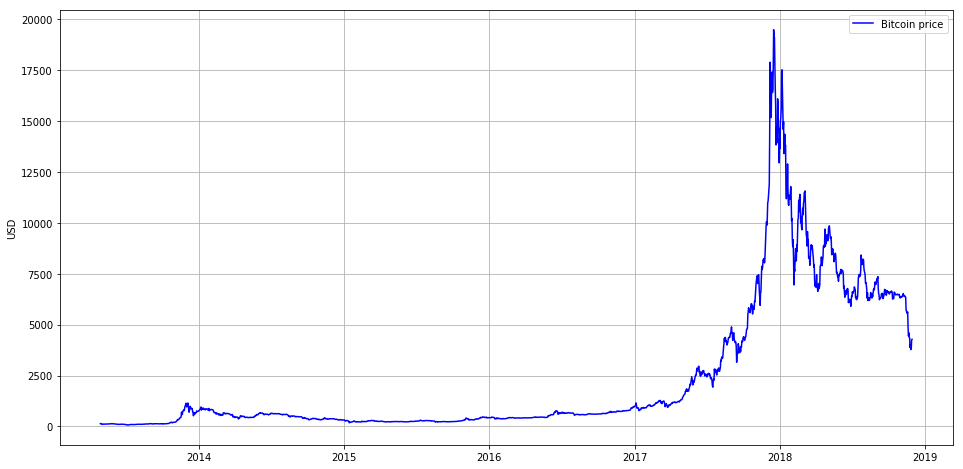

In [82]:
plt.figure(figsize=(16,8))
plt.plot_date(Bitcoin['date'], Bitcoin['close'], fmt='b-', xdate=True, ydate=False, label='Bitcoin price') 
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

In [83]:
data = df[df['date'] >= '2017']

In [84]:
data[data['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2              [XRP]
3         [Ethereum]
4          [Stellar]
5     [Bitcoin Cash]
6              [EOS]
7         [Litecoin]
8           [Tether]
9       [Bitcoin SV]
10         [Cardano]
Name: name, dtype: object

In [85]:
Bitcoin = data[data['name']=='Bitcoin']
XRP = data[data['name']=='XRP']
Ethereum = data[data['name']=='Ethereum']
Stellar = data[data['name']=='Stellar']
Bitcoin_Cash = data[data['name']=='Bitcoin Cash']

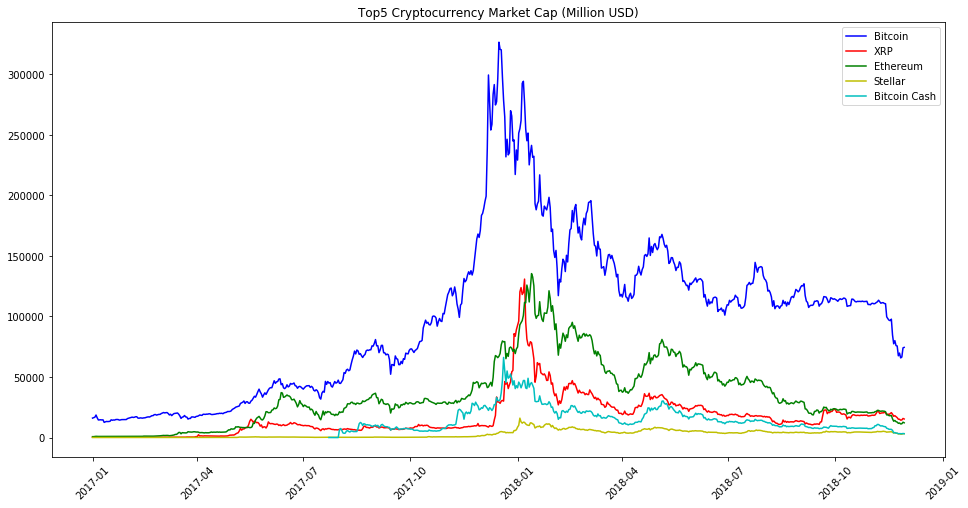

In [86]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['market']/1000000, fmt='b-', xdate=True, ydate=False, label='Bitcoin')
plt.plot_date(XRP['date'], XRP['market']/1000000, fmt='r-', xdate=True, ydate=False, label='XRP') 
plt.plot_date(Ethereum['date'], Ethereum['market']/1000000, fmt='g-', xdate=True, ydate=False, label='Ethereum') 
plt.plot_date(Stellar['date'], Stellar['market']/1000000, fmt='y-', xdate=True, ydate=False, label='Stellar') 
plt.plot_date(Bitcoin_Cash['date'], Bitcoin_Cash['market']/1000000, fmt='c-', xdate=True, ydate=False, label='Bitcoin Cash') 

plt.legend()
plt.title('Top5 Cryptocurrency Market Cap (Million USD)')
plt.show()

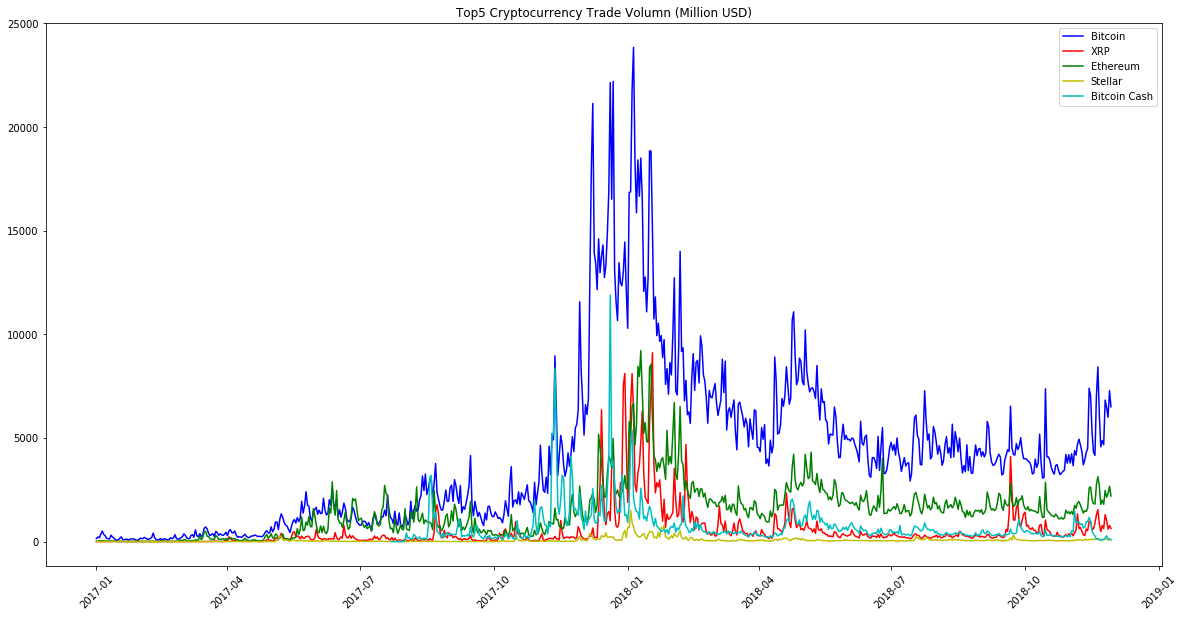

In [87]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['volume']/1000000, fmt='b-', xdate=True, ydate=False, label='Bitcoin')
plt.plot_date(XRP['date'], XRP['volume']/1000000, fmt='r-', xdate=True, ydate=False, label='XRP') 
plt.plot_date(Ethereum['date'], Ethereum['volume']/1000000, fmt='g-', xdate=True, ydate=False, label='Ethereum') 
plt.plot_date(Stellar['date'], Stellar['volume']/1000000, fmt='y-', xdate=True, ydate=False, label='Stellar') 
plt.plot_date(Bitcoin_Cash['date'], Bitcoin_Cash['volume']/1000000, fmt='c-', xdate=True, ydate=False, label='Bitcoin Cash') 

plt.legend()
plt.title('Top5 Cryptocurrency Trade Volumn (Million USD)')
plt.show()

In [88]:
Bitcoin_data = Bitcoin.set_index('date')
XRP_data = XRP.set_index('date')
Ethereum_data = Ethereum.set_index('date')
Stellar_data = Stellar.set_index('date')
Bitcoin_Cash_data  = Bitcoin_Cash.set_index('date')

In [89]:
btc = Bitcoin_data[['close']]
btc.columns = ['BTC']

xrp = XRP_data[['close']]
xrp.columns = ['XRP']

eth = Ethereum_data[['close']]
eth.columns = ['ETH']

xlm = Stellar_data[['close']]
xlm.columns = ['XLM']

bch = Bitcoin_Cash_data[['close']]
bch.columns = ['BCH']

close = pd.concat([btc,xrp,eth,xlm,bch], axis=1, join='inner')

In [90]:
close.index.values[0]

numpy.datetime64('2017-07-23T00:00:00.000000000')

In [91]:
close.index.values[len(close)-1]

numpy.datetime64('2018-11-29T00:00:00.000000000')

In [92]:
coins_get = (5000/close.iloc[0]).round(3)
coins_get

BTC         1.831
XRP     25633.401
ETH        22.129
XLM    229684.414
BCH        12.105
Name: 2017-07-23 00:00:00, dtype: float64

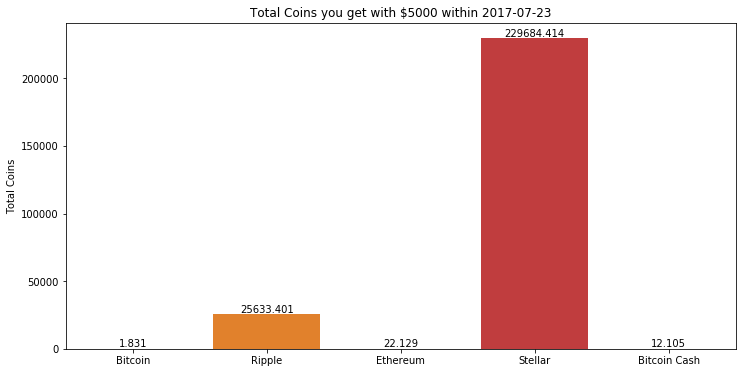

In [93]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'],coins_get.values)
plt.title('Total Coins you get with $5000 within 2017-07-23')
plt.ylabel('Total Coins')
rects = ax.patches
labels = coins_get.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [94]:
value_earn = coins_get * close.tail(1)
value_earn = value_earn.stack()
value_earn.index = value_earn.index.droplevel(0)

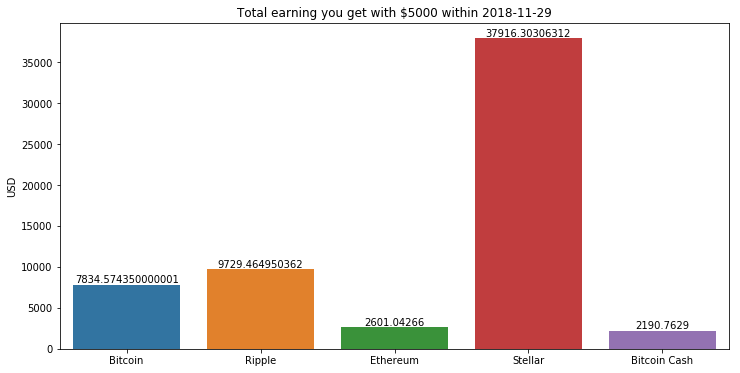

In [95]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'], value_earn)
plt.title('Total earning you get with $5000 within 2018-11-29')
plt.ylabel('USD')
rects = ax.patches
labels = value_earn.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [96]:
Bitcoin.drop(['slug','volume','symbol','name','ranknow','market','close_ratio','spread'],axis=1,inplace=True)
Bitcoin.dropna(inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
Bitcoin.head()
Bitcoin = Bitcoin.reset_index(level=0, drop=True)

In [136]:
from sklearn.model_selection import train_test_split
X = Bitcoin[['open','high','low','date2num']]
y = Bitcoin['close']

nrow , ncol = Bitcoin.shape

In [137]:
X_test = X.loc[:np.floor(nrow*0.3)]
X_train = X.loc[np.floor(nrow*0.3)+1:]

In [146]:
y_test = y.loc[:np.floor(nrow*0.3)]
y_train = y.loc[np.floor(nrow*0.3)+1:]

In [147]:
date_test = Bitcoin[['date']].loc[:np.floor(nrow*0.3)]
date_train = Bitcoin[['date']].loc[np.floor(nrow*0.3)+1:]

In [148]:
def plot_stock(date, outcome, prediction=None):
    # your code here
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    plt.plot_date(date, outcome, fmt='b-', xdate=True, ydate=False, label='Real value')
    if prediction is not None:
        plt.plot_date(date, prediction, fmt='r-', xdate=True, ydate=False, label='prediction')
    plt.ylabel('Close prices')
    plt.title('Vingroup - VIC')
    plt.legend()
    plt.grid()
    plt.show()
    return

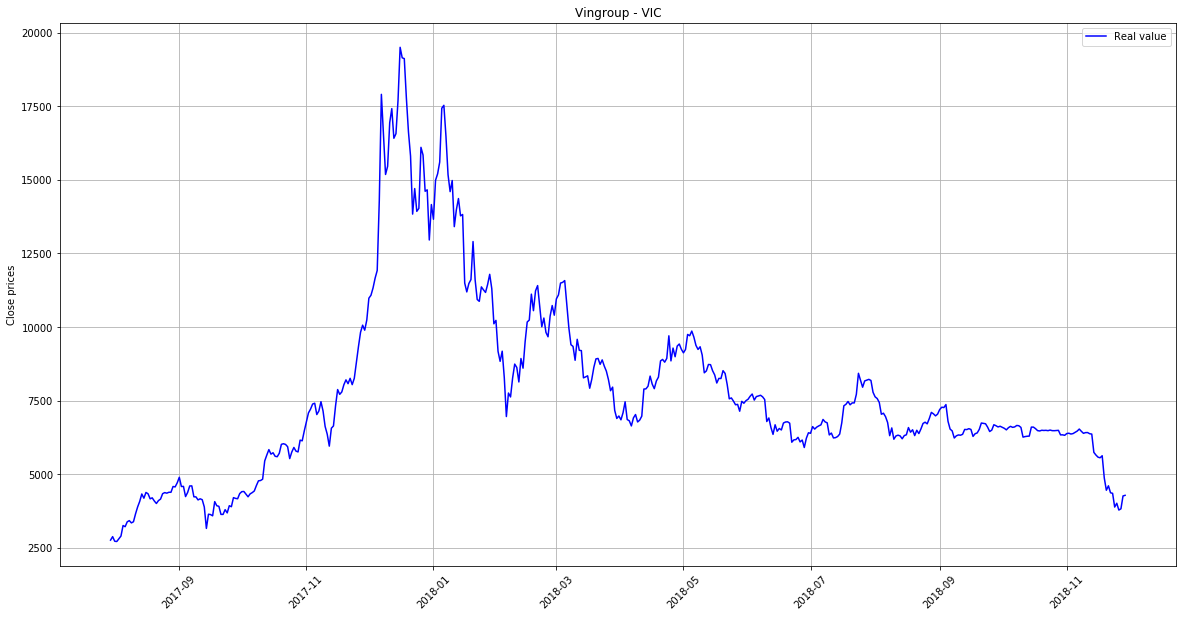

In [149]:
plot_stock(date_train, y_train)

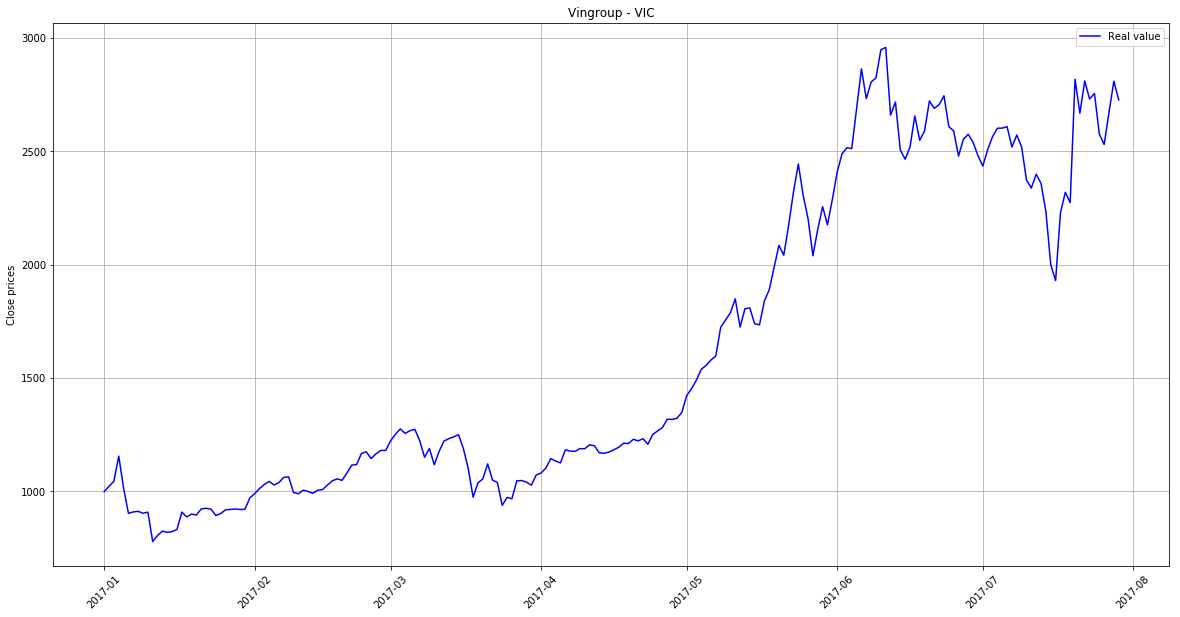

In [159]:
plot_stock(date_test, y_test)

In [150]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
print(lm.coef_)
print(lm.intercept_)

[-0.51676031  0.94555401  0.55727345  0.04673163]
-34392.03746746614


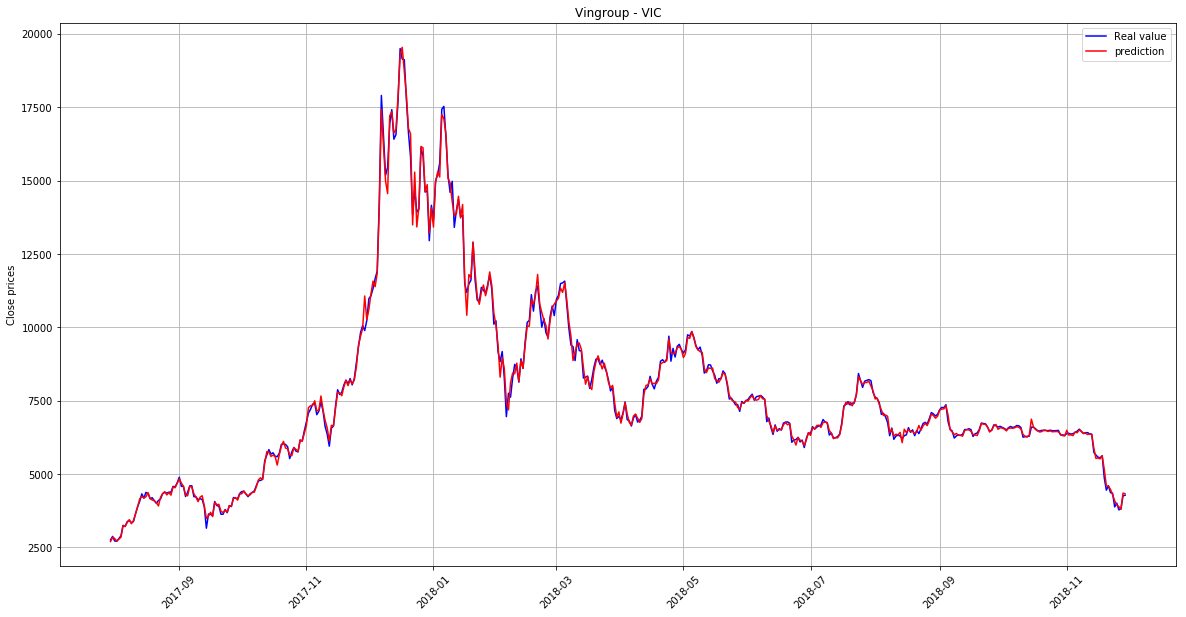

In [152]:
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, predictions_train)

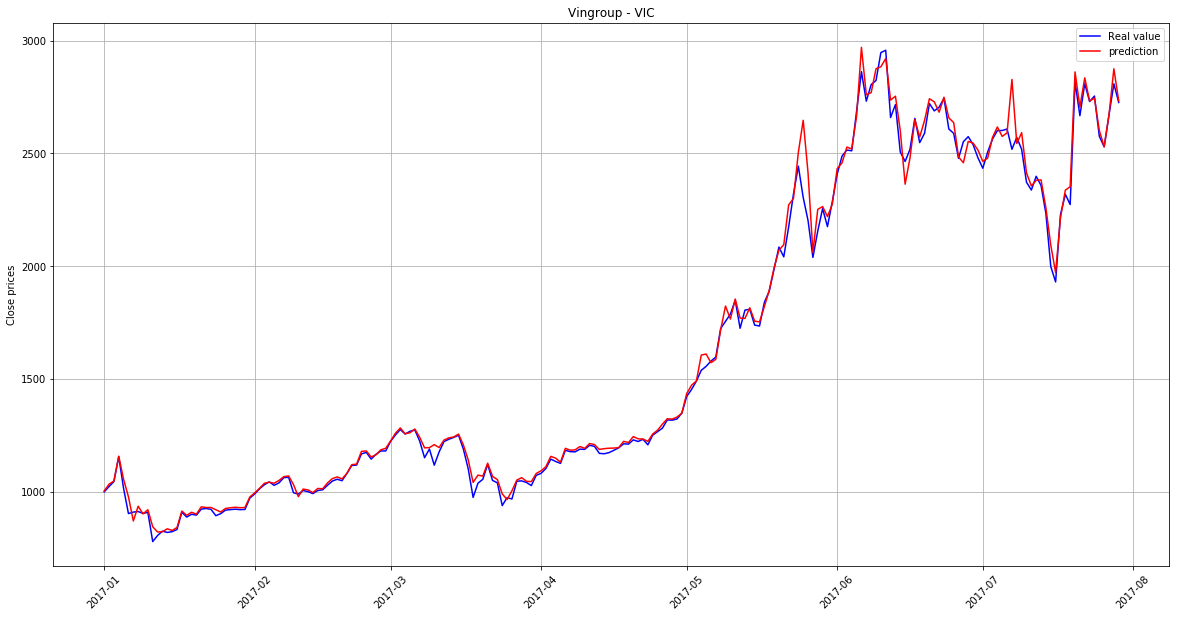

In [160]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, predictions_test)

### END